# Kohonen map

SOM clustering of noisy points of a quadratic circle
Example 5.4.5 from Awange, Paláncz, Völgyesi (2020)

<IPython.core.display.Javascript object>


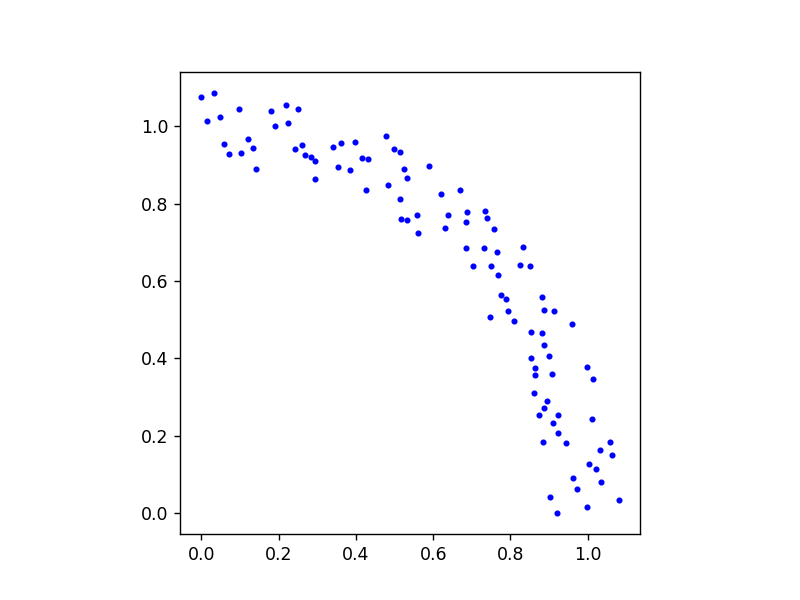

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

# generate noisy data
angles = np.linspace(0,np.pi/2,num=101)
r = np.random.uniform(0.9,1.1,101)
x = r*np.cos(angles)
y = r*np.sin(angles)

plt.plot(x,y,'b.',ms=5)
plt.axis('scaled')
plt.show()

using MiniSom (https://github.com/JustGlowing/minisom) for clustering

<IPython.core.display.Javascript object>


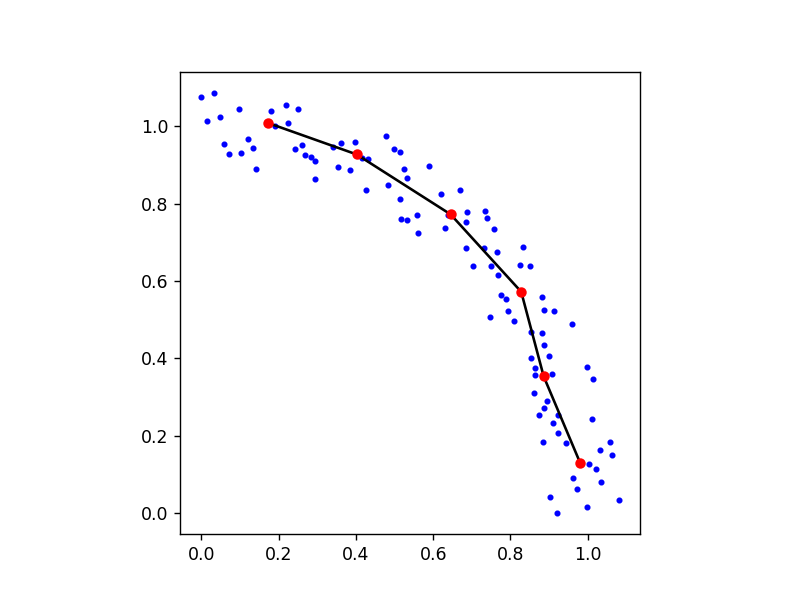

In [2]:
# SOM clustering with nc codebook vectors
# organize data
data = np.column_stack((x,y))

# train with MiniSom
from minisom import MiniSom
nc = 6
nit = 1000
som = MiniSom(1, nc, 2, sigma=0.8, learning_rate=0.5) # initialization of 1 x nc SOM
som.random_weights_init(data)
som.train(data, nit, random_order=True, verbose=False) # trains the SOM with nit iterations
w = som.get_weights()[0]

# plot weights
plt.figure()
plt.plot(x,y,'b.',ms=5)
plt.axis('scaled')
plt.plot(w[:,0],w[:,1],'k-')
plt.plot(w[:,0],w[:,1],'r.',ms=10)
plt.show()

Low resolution sensor data processing with SOM. Example 5.4.6 from Awange, Paláncz, Völgyesi (2020)

<IPython.core.display.Javascript object>


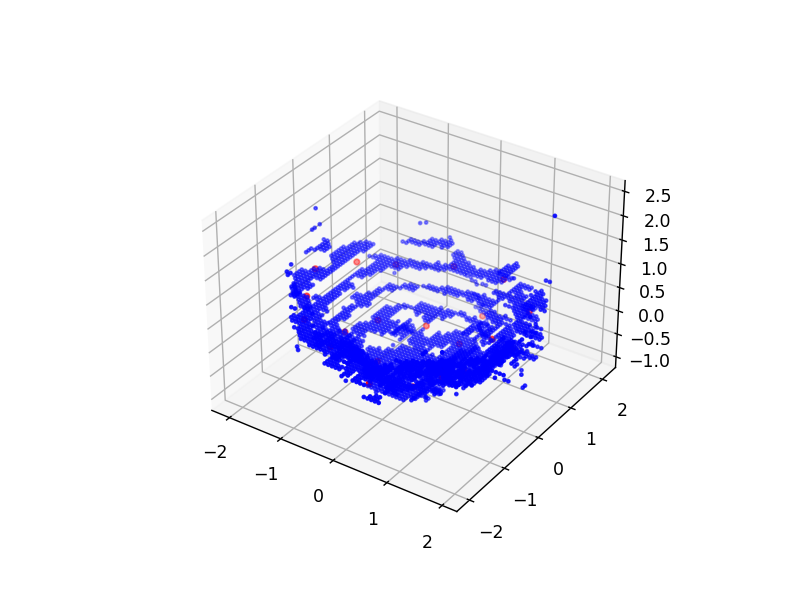

In [3]:
# 2710 Kinect 3D sensor data
data = np.loadtxt('f_03_05.txt')
x = data[:,0]
y = data[:,1]
z = data[:,2]
# shift to mean and normalize
x -= x.mean()
y -= y.mean()
z -= z.mean()
c = x.std()
x /= c
y /= c
z /= c
data = np.column_stack((x,y,z))
plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, c='b', s=3);

# represent the measured points with 25 codebook vectors 
# positioned in 1 x nc symmetric SOM

nc = 25
nit = 10000
som = MiniSom(1, nc, 3, sigma=0.9, learning_rate=0.5)
som.random_weights_init(data)
som.train(data, nit, random_order=True, verbose=False)
w = som.get_weights()[0]
ax.scatter3D(w[:,0],w[:,1],w[:,2],c='r', s=10)
plt.show()
